<a href="https://colab.research.google.com/github/farhan1503001/Time-Series-Analysis-and-Natural-Language-Processing/blob/main/NLP_Shakespear_writing_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-01-12 19:04:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-01-12 19:04:34 (87.6 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150))
model.add(Dense(total_words/2,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(total_words,activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
print(model.summary())


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
lstm_14 (LSTM)               (None, 10, 150)           150600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 150)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_14 (Dense)             (None, 1605)              242355    
_________________________________________________________________
dense_15 (Dense)             (None, 3211)              5156866   
Total params: 6,051,521
Trainable params: 6,051,521
Non-trainable params: 0
____________________________________________

In [ ]:
#@title Default title text
 history = model.fit(predictors, label, epochs=350, verbose=1)

Train on 15462 samples
Epoch 1/350
15462/15462 [==============================] - 22s 1ms/sample - loss: 0.8295 - acc: 0.8311
Epoch 2/350
15462/15462 [==============================] - 22s 1ms/sample - loss: 0.8127 - acc: 0.8335
Epoch 3/350
15462/15462 [==============================] - 22s 1ms/sample - loss: 0.8107 - acc: 0.8337
Epoch 4/350
15462/15462 [==============================] - 21s 1ms/sample - loss: 0.8188 - acc: 0.8286
Epoch 5/350
15462/15462 [==============================] - 22s 1ms/sample - loss: 0.8160 - acc: 0.8308
Epoch 6/350
15462/15462 [==============================] - 22s 1ms/sample - loss: 0.8065 - acc: 0.8344
Epoch 7/350
15462/15462 [==============================] - 22s 1ms/sample - loss: 0.8065 - acc: 0.8338
Epoch 8/350
15462/15462 [==============================] - 22s 1ms/sample - loss: 0.8127 - acc: 0.8329
Epoch 9/350
15462/15462 [==============================] - 22s 1ms/sample - loss: 0.8025 - acc: 0.8352
Epoch 10/350
15462/15462 [========================

KeyboardInterrupt: ignored

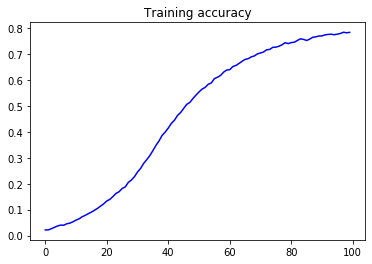

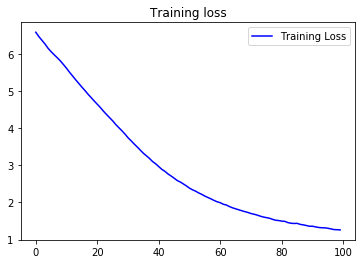

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope and shine is good days alone away the crave showers still with light light room room repair new still prove last ' behind alone smell behind so death long be horse alone with me remain light twain dyed room behind behind 'no ' graced repair still shown seen hate dyed elsewhere new dyed ' prove long each new ' kind new of be behind old treasure ' eyes eyes shown prove hence alone repair may find be wanting behind of woe dyed days eyes tell me none behold ' kind elsewhere prove alone date smell ' away away about hate
